In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pydot
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Dense, Concatenate, Conv2D, Flatten, Reshape, Conv2DTranspose, MaxPooling2D, UpSampling2D, GlobalMaxPooling2D, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[6]')

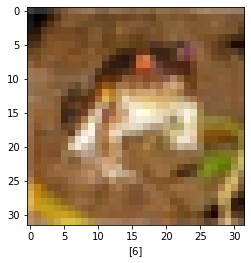

In [11]:
plt.imshow(X_train[0])
plt.xlabel(y_train[0])

In [13]:
for i in range(0,50000):
    X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2HSV)
    #y_train[i] = cv2.cvtColor(y_train[i], cv2.COLOR_BGR2HSV)

for j in range(0,10000):
    X_test[j] = cv2.cvtColor(X_test[j], cv2.COLOR_BGR2HSV)
    #y_test[j] = cv2.cvtColor(y_test[j], cv2.COLOR_BGR2HSV)

In [ ]:
# X_train_hue = []
# X_test_hue = []
# X_train_value = []
# X_test_value = []
# X_train_saturation = []
# X_test_saturation = []

In [ ]:
# for k in range(0,50000):
#   X_train_hue.append(X_train[k][...,0])
#   X_train_saturation.append(X_train[k][...,1])
#   X_train_value.append(X_train[k][...,2])

# for l in range(0,10000):
#   X_test_hue.append(X_test[l][...,0])
#   X_test_value.append(X_test[l][...,2])
#   X_test_saturation.append(X_test[l][...,1])

In [14]:
# plt.imshow(X_train_hue[0])

NameError: ignored

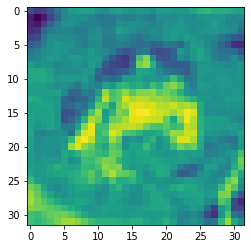

In [ ]:
# plt.imshow(X_train_value[0])

In [ ]:
# X_train_value = np.array(X_train_value)
# X_train_hue = np.array(X_train_hue)
# X_test_value = np.array(X_test_value)
# X_test_hue = np.array(X_test_hue)
# X_train_saturation = np.array(X_train_saturation)
# X_test_saturation = np.array(X_test_saturation)

In [ ]:
# X_train_value = X_train_value.reshape(50000, 32, 32, 1)
# X_train_hue = X_train_hue.reshape(50000, 32, 32, 1)
# X_train_saturation = X_train_saturation.reshape(50000, 32, 32, 1)
# X_test_saturation= X_test_saturation.reshape(10000, 32, 32, 1)
# X_test_value = X_test_value.reshape(10000, 32, 32, 1)
# X_test_hue = X_test_hue.reshape(10000, 32, 32, 1)

In [ ]:
# def encoder1():
#     encoder1_input = Input(shape=(32, 32, 1))
#     x = Conv2D(16, (3,3), activation="relu", padding='same')(encoder1_input)
#     x = MaxPooling2D()(x)
#     x = Conv2D(32, (3,3), activation="relu", padding='same')(x)
#     x = MaxPooling2D()(x)
#     x = Flatten()(x)
#     encoder1_output = Dense(100, activation="relu")(x)
#     return Model(encoder1_input, encoder1_output, name = "encoder1")

In [ ]:
# def encoder2():
#   encoder2_input = Input(shape=(32, 32, 1))
#   x = Conv2D(16, (3,3), activation="relu", padding='same')(encoder2_input)
#   x = MaxPooling2D()(x)
#   x = Conv2D(32, (3,3), activation="relu", padding='same')(x)
#   x = MaxPooling2D()(x)
#   x = Flatten()(x)
#   encoder2_output = Dense(100, activation="relu")(x)
#   return Model(encoder2_input, encoder2_output, name = "encoder2")

In [ ]:
# def junction():
#     in1 = Input(shape=(100,))
#     in2 = Input(shape=(100,))
#     x = Concatenate()([in1, in2])
#     out = Flatten()(x)
#     return Model([in1, in2], out, name = "Junction")

In [15]:
def tot_encoder():
    encoder_input = Input(shape=(32, 32, 3))
    x = Reshape((32, 32, 1))(encoder_input[..., 0])
    x = Conv2D(16, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder1_output = Dense(100, activation="relu")(x)

    x = Reshape((32, 32, 1))(encoder_input[..., 1])
    x = Conv2D(16, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder2_output = Dense(100, activation="relu")(x)

    x = Reshape((32, 32, 1))(encoder_input[..., 2])
    x = Conv2D(16, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder3_output = Dense(100, activation="relu")(x)

    junc = Concatenate()([encoder1_output, encoder2_output, encoder3_output])
    return Model(encoder_input, Flatten()(junc), name="tot_encoder")

Model: "tot_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_2 (Te [(None, 32, 32)]     0           input_1[0][0]                    
________________________________________________________________________________________

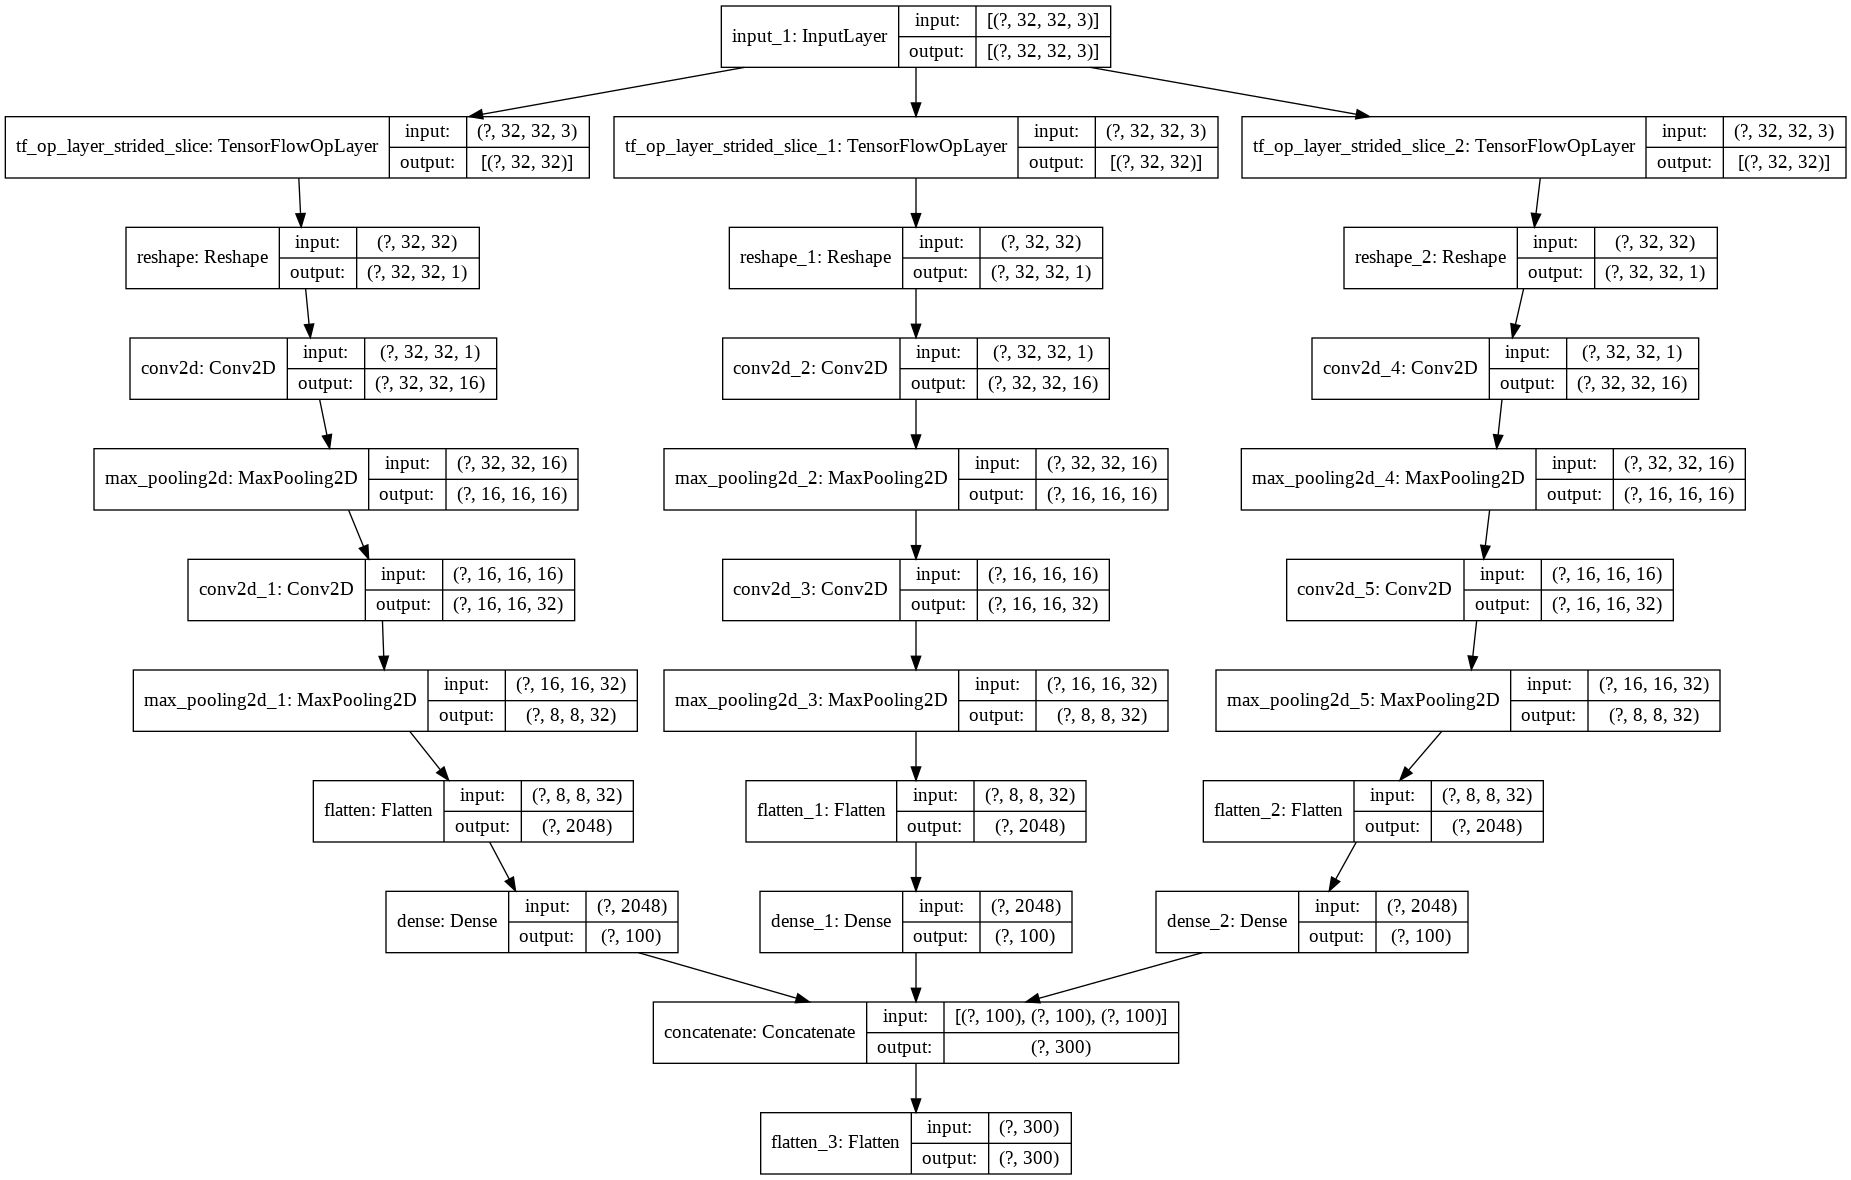

In [16]:
tot_encoder = tot_encoder()
tot_encoder.summary()
plot_model(tot_encoder,to_file="tot_encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [21]:
def decoder():
  decoder_input1 = Input(shape=(3*100,))
  x = Dense(8*8*32)(decoder_input1)
  x = Reshape((8, 8, 32))(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(16, (3,3), activation="relu", padding="same")(x)
  x = UpSampling2D()(x)
  decoder_output = Conv2DTranspose(3, 3, activation="sigmoid", padding='same')(x)
  return Model(decoder_input1, decoder_output, name="decoder")

In [ ]:
# encoder1 = encoder1()
# encoder1.summary()

Model: "encoder1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               204

In [ ]:
# encoder2 = encoder2()
# encoder2.summary()

Model: "encoder2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               204

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              616448    
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 8, 32)          0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 16)        4624      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 32, 3)         435 

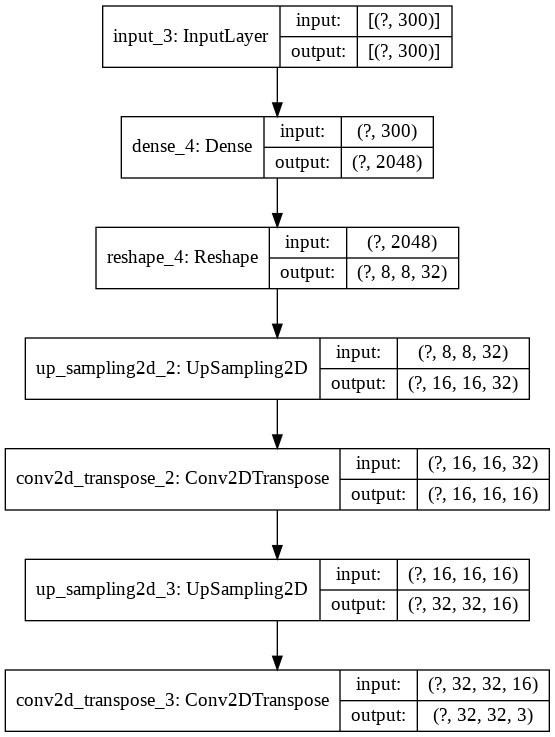

In [22]:
decoder = decoder()
decoder.summary()
plot_model(decoder,to_file="decoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 16)   160         input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 16)   160         input_15[0][0]                   
______________________________________________________________________________________

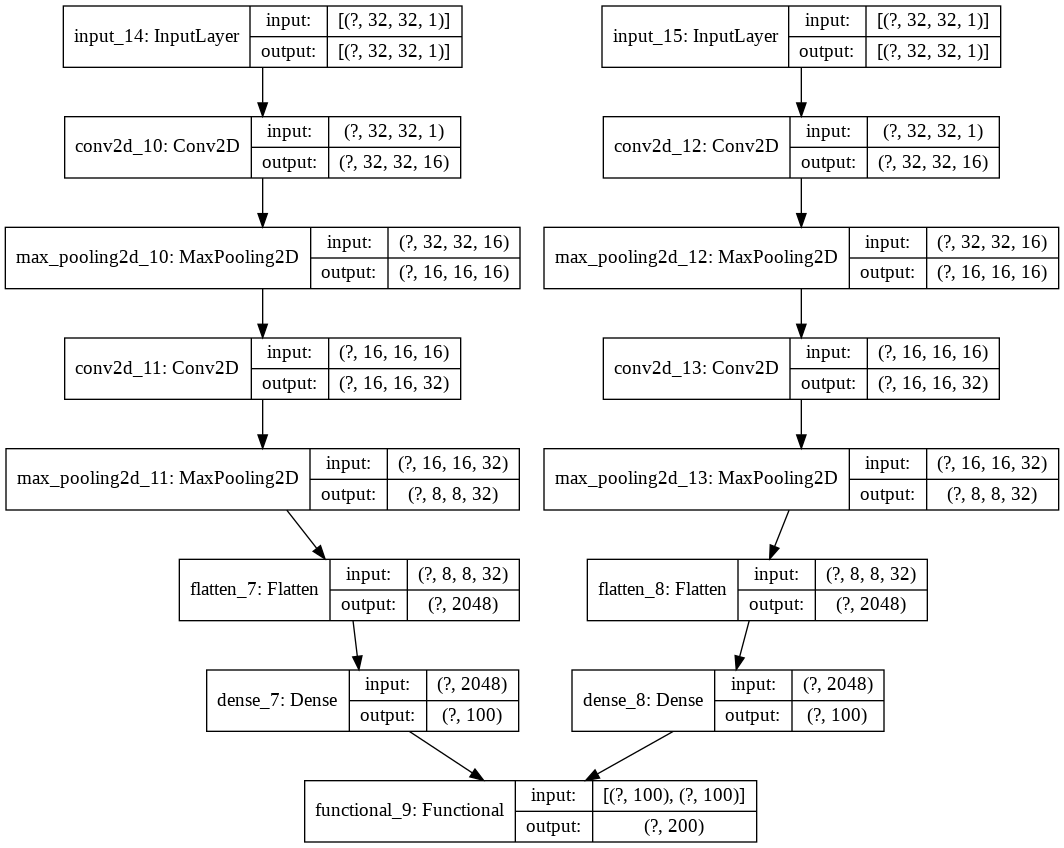

In [ ]:
# junction = junction()
# encoder = Model([encoder1.input, encoder2.input], junction([encoder1.output, encoder2.output]))
# encoder.summary()
# plot_model(encoder,to_file="encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_2 (Te [(None, 32, 32)]     0           input_1[0][0]                    
________________________________________________________________________________________

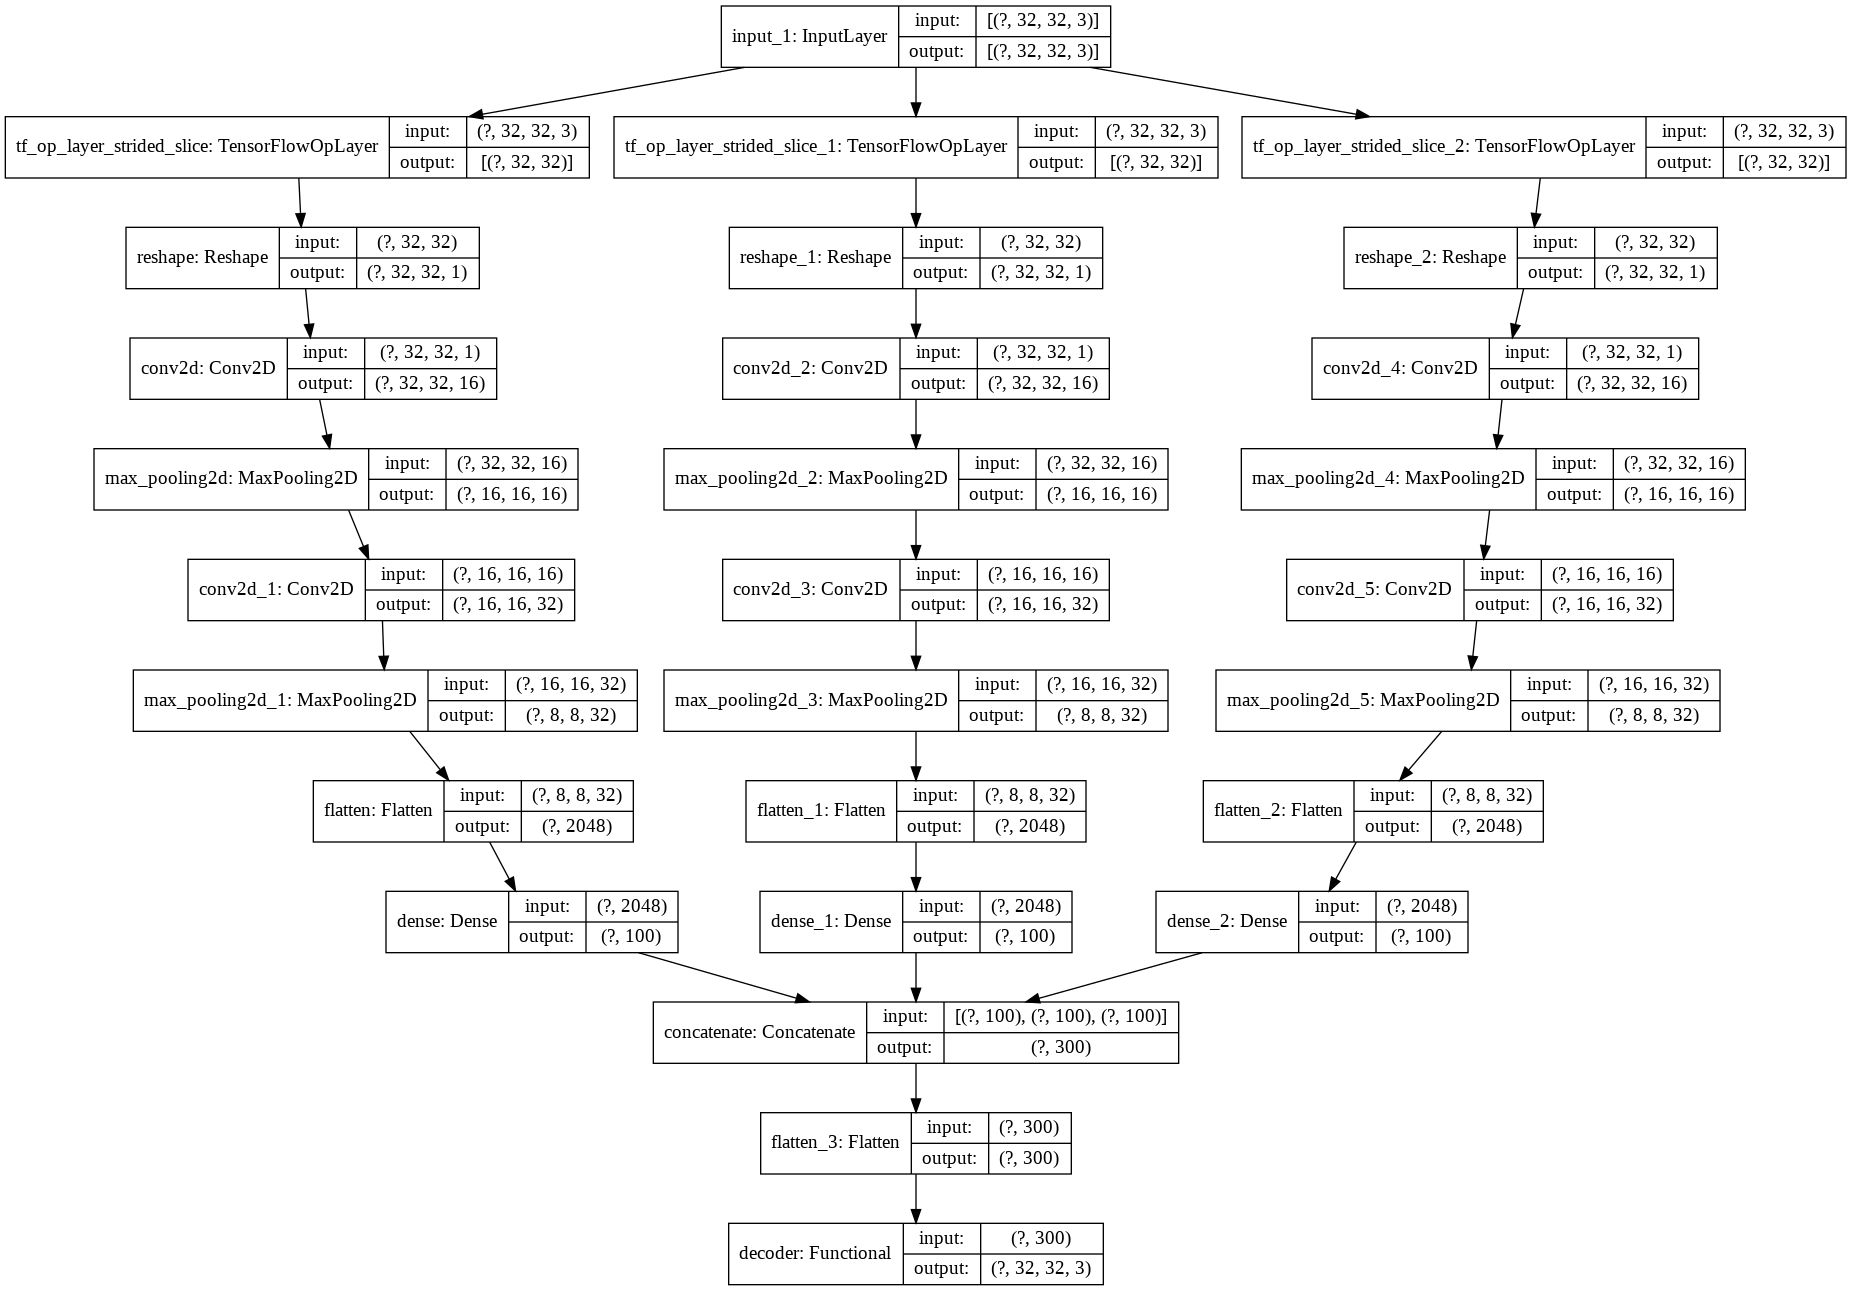

In [23]:
autoencoder = Model(tot_encoder.input, decoder(tot_encoder.output), name="autoencoder")
autoencoder.summary()
plot_model(autoencoder,to_file="autoencoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [24]:
autoencoder.compile(loss = 'mae', optimizer = 'Adam', metrics=["accuracy"])

In [25]:
X_train = X_train.astype('float32')/360.0
X_test = X_test.astype('float32')/360.0
X_train = X_train.astype('float32')/100.0
X_test = X_test.astype('float32')/100.0

In [26]:
autoencoder.fit(X_train, X_train, epochs = 1, batch_size = 32)

1563/1563 [==============================] - 11s 7ms/step - loss: 0.0068 - accuracy: 0.1294


In [ ]:
# hue_decoded = autoencoder.predict(X_test_hue)

In [ ]:
# X_train_hue = X_train_hue.astype('float32')*360
# X_test_hue = X_test_hue.astype('float32')*360
# X_train_value = X_train_value.astype('float32')*100
# X_test_value = X_test_value.astype('float32')*100